In [18]:
import os
from extractInfo import * 
from XYZdihedral import * 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy
from scipy import optimize
import pandas as pd
import shutil
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

# @hidden_cell

In [19]:
dirs = [x for x in os.listdir(".") if not x.__contains__(".")]
print(dirs)

['4c1_a1_a4_4c1_PHI', '4c1_a1_a4_4c1_PSI', '4c1_b1_4e_4c1_PHI', '4c1_b1_4e_4c1_PSI', '4c1_b1_e3_4c1_PHI', '4c1_b1_e3_4c1_PSI', '__pycache__']


In [20]:
# d = []
# data = {}
# duhhh = open("torsion_energy_name.csv", "w")

# for directory in dirs:
#     print(directory)
#     data[directory] = {}
#     for file in os.listdir(directory):
#         if file.__contains__(".out"):
#             out = ExtractGaussInfo(directory+"/"+file)
#             out.makeXYZ()
#             out = ExtractGaussInfo(directory+"/"+file)
#             duhhh.write("{},{},{}\n".format(file, (out.getEnergy()), (out.getDihedral())))
#             d.append(out.getEnergy())
#             if out.getEnergy() == None:
#                 print(out.info)
#             data[directory][out.getDihedral()] = out.getEnergy()


        
# print(len(d))
# print(data)

4c1_a1_a4_4c1_PHI
4c1_a1_a4_4c1_PSI
4c1_b1_4e_4c1_PHI
4c1_b1_4e_4c1_PSI
4c1_b1_e3_4c1_PHI
4c1_b1_e3_4c1_PSI
__pycache__
156
{'4c1_a1_a4_4c1_PHI': {65.14494945202068: -617.5091328, 80.14485768026766: -617.5086843, -144.85521356409566: -617.5012587, -129.8551990399701: -617.4990274, -114.85501479895974: -617.4979307, -99.85500246559404: -617.4977538, -84.85502841442577: -617.4978189, -69.85496958061954: -617.4978214, -54.85509166986524: -617.4970462, -39.85512913564412: -617.4955976, -24.85512905996183: -617.4943998, -9.855122768581099: -617.4941406, 95.14486447877042: -617.5075289, 5.145120374676283: -617.497127, 20.145145031814184: -617.5020932, 35.14507142162392: -617.5070585, 50.14502267676342: -617.5093328, 65.1449195006283: -617.5091328, 65.1449195004041: -617.5091328, 110.14503655923298: -617.5066736, 125.14495018420428: -617.506354, 140.1449306059764: -617.505327, 155.14494204363405: -617.5052682, 170.14487459496894: -617.5041384, -174.85506715764356: -617.5052037, -159.855250664

[5.1449328423564396, 20.14474933540035, 35.14478643590434, 50.1448009600299, 65.14498520104026, 80.14499753440596, 95.14497158557423, 110.14503041938046, 125.14490833013477, 140.14487086435588, 155.14487094003817, 170.1448772314189, 185.14512037467628, 200.1451450318142, 215.14507142162392, 230.1450226767634, 245.14491950040411, 245.1449195006283, 245.14494945202068, 260.14485768026765, 275.1448644787704, 290.14503655923295, 305.1449501842043, 320.1449306059764, 335.14494204363405, 350.14487459496894]
[2.5910515409777872, 3.4365585149498656, 5.0665784910088405, 6.4667415539734066, 7.154931770986877, 7.265938289987389, 7.2250873890006915, 7.223518613958731, 7.7099643659894355, 8.618975352030247, 9.370606829994358, 9.533257421979215, 7.659261558030266, 4.542921396030579, 1.4271459930459969, 0.0, 0.1255020000389777, 0.1255020000389777, 0.1255020000389777, 0.40694023499963805, 1.1319652890088037, 1.6686745919869281, 1.8692267879960127, 2.513679558003787, 2.5505771459429525, 3.2595379439881

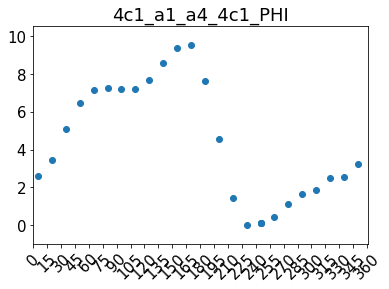

[4.1576629763532935, 19.15769736155741, 34.15771625586186, 49.15787205021152, 64.1577631393062, 79.15793914304055, 94.15759459654892, 109.1580578613186, 124.1578579466283, 139.1578181744179, 154.15783049584655, 169.15798858531852, 184.1580222948634, 199.15801411445682, 214.15800784656196, 229.1579984640829, 244.1578694439835, 259.1579335155918, 274.1578331523963, 274.15783315501136, 274.157842142304, 289.15782135882506, 304.15791754418035, 319.15784783498486, 334.15770724633603, 349.1578915852768]
[0.39269575802609324, 1.6631525040138513, 4.689131226041354, 5.346949958999176, 4.830069972027559, 4.511734149069525, 4.970318456995301, 4.6881272100145, 4.246422921074554, 4.627007736067753, 5.5373364930273965, 6.415222983050626, 5.101279794063885, 3.097954119089991, 1.1118222180521116, 0.0, 0.02698293002322316, 0.08490210300078616, 0.16829818207770586, 0.16829818207770586, 0.16829818207770586, 0.49912145402049646, 0.47113450802862644, 0.046623993082903326, 0.2662524930201471, 0.617720843991

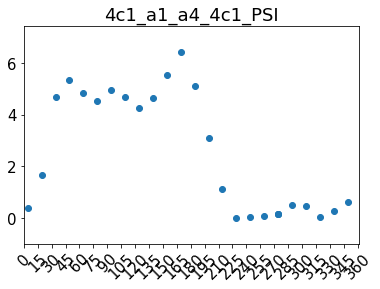

[2.4544109981797817, 17.45444430627876, 32.45449431389622, 47.45445304187058, 62.45436588964603, 77.45440549512809, 92.45446840103838, 92.45446840356679, 92.45450121251368, 107.45422108041595, 122.45425506587162, 137.4542147524322, 152.454245126721, 167.45437873573826, 182.45436741109884, 197.45455165713224, 212.4546063318934, 227.45460932964738, 242.45436848278058, 257.4542032110526, 272.45421323439075, 287.45427258003997, 302.4543452227701, 317.45444497497607, 332.4546026210101, 347.45443457303355]
[2.5470630900235847, 2.460152955027297, 2.2067644170601852, 2.1170304869883694, 1.6118221859796904, 0.8112449279869907, 0.07925451302435249, 0.07925451302435249, 0.07925451302435249, 0.0, 0.7629266580333933, 2.4107051670434885, 4.432165881036781, 5.794113585026935, 6.024974514031783, 5.308295343013015, 4.047690503997728, 2.4683105850126594, 1.6795932660461403, 2.070908501977101, 3.5847763769561425, 4.971887232037261, 5.324171346030198, 4.842118164000567, 3.796184496022761, 2.77328044502064

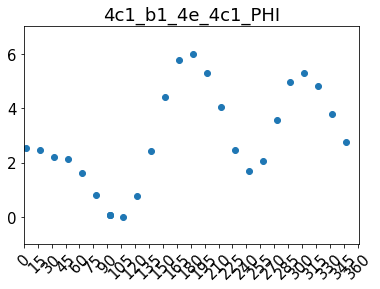

[8.84672393694413, 23.846589758659377, 38.84658872240797, 53.8466362398059, 68.84698270699622, 83.84696972434845, 98.8469416650228, 113.84663352693119, 128.84667255930174, 143.84683244029407, 158.84671662555633, 173.84661563883765, 188.8467131988708, 203.846931068066, 218.8469658015746, 233.84698955898753, 248.84677732622464, 263.8467617295861, 278.8468361796348, 278.8469692468525, 293.846857311136, 308.8469115112553, 323.84684946782374, 338.8467545478276, 353.8466144530896]
[1.0522087679128163, 1.7043799109524116, 3.006400409969501, 4.234500230988488, 4.472389272006694, 3.085215665982105, 1.8104291009367444, 1.8460089179570787, 2.7036895859637298, 2.284889411937911, 2.389307075936813, 3.0892944809165783, 3.6159636239754036, 3.2342492909519933, 1.9417669440153986, 0.8670305669074878, 0.6662273669498973, 0.970632467942778, 0.6424447379540652, 0.6424447379540652, 0.384287123917602, 0.25508281495422125, 0.0, 0.12562750198412687, 0.8494602869614027]
8.84672393694413,1.0522087679128163

23.

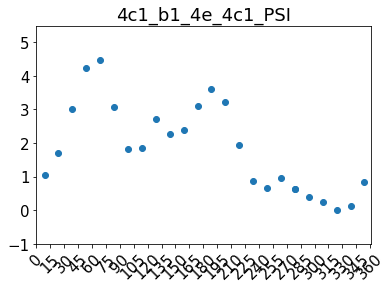

[0.22844024691752907, 15.228587468241358, 30.228445909529228, 45.22840638391108, 60.2283819668794, 75.22848359293071, 90.22840355877665, 90.22840356383338, 90.22851605205011, 105.22840009406868, 120.22826084142827, 135.22822977994406, 150.22819585446604, 165.2283036366249, 180.22843450546205, 195.2285441721729, 210.2286196333564, 225.2286087314784, 240.22850927024456, 255.2282996351151, 270.22819473986846, 285.22824996191383, 300.2283563334399, 315.22851108026987, 330.2285567719843, 345.228599125444]
[2.4176705279387534, 2.6050450139446184, 2.115963719901629, 1.9943522819667123, 1.5313126529799774, 0.7079567819600925, 0.3931977659231052, 0.3931977659231052, 0.2094628379563801, 0.0, 0.4332956549478695, 1.1851153859170154, 3.165285941970069, 5.221447958960198, 6.3579313199734315, 6.1055467979749665, 4.678526306932326, 3.0058356509543955, 1.975213226978667, 2.06563741795253, 3.40957558498485, 4.949673377966974, 5.412148247938603, 4.96711815596791, 3.8968998509808443, 2.7895957049913704]
0

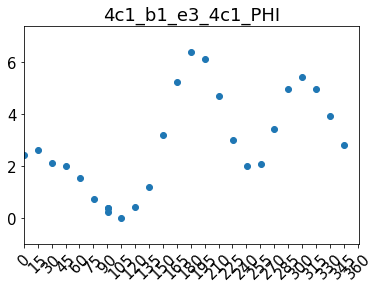

[5.383299193501955, 20.383162334855115, 35.38327471488253, 50.38328083068873, 65.38316600429161, 80.38323630152256, 80.38323630898086, 80.38326010819229, 95.38327003712654, 110.383213045792, 125.38327037462543, 140.3830402634099, 155.38303726712473, 170.38294242497693, 185.38313352507518, 200.38344535725452, 215.3834403997543, 230.38346902306574, 245.38295270171864, 260.38322909752975, 275.3830793196986, 290.38315113348517, 305.3831601742678, 320.3832795110469, 335.3834958013073, 350.3834467995432]
[0.3784512809361331, 0.7305471419822425, 0.6912650159792975, 0.4921560929506086, 0.4696912349900231, 0.23732428200310096, 0.23732428200310096, 0.23732428200310096, 0.0, 0.31130771100288257, 0.4555722600198351, 0.8453187209670432, 1.956827183952555, 3.2532628439948894, 4.013553960015997, 3.534010817995295, 2.2432227479293942, 1.5509537159232423, 2.137989320908673, 2.934864269918762, 2.4973015469731763, 2.990775411017239, 3.736571045999881, 3.6367342050070874, 2.3286268590018153, 0.90763046400

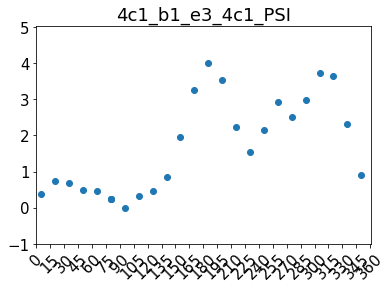

In [21]:
# # THIS CODE WRITES CSVS (DO NOT RUN AGAIN UNLESS YOU WANT TO WRITE OVER THE CSV FILES)

# for titles in data.keys():
#     if titles.__contains__("PHI") or titles.__contains__("PSI"):
#         x = []
#         y = []
#         keys = list(data[titles].keys())
#         keys.sort()
#         for k in keys:
#             x.append(k+180)
#             y.append(data[titles][k]*627.51)


#         axes = plt.gca()
#         axes.set_xlim([0,361])
#         plt.xticks(np.arange(0, 361, step=15), rotation=45)

#         y = [value - min(y) for value in y]    
#         axes.set_ylim([-1, max(y)+1])
        
#         newfile = open(titles+".csv", "w")
#         print(x)
#         print(y)
#         for n in range(len(x)):
#             newfile.write("{},{}\n".format(x[n], y[n]))
#             print("{},{}\n".format(x[n], y[n]))
        
        
#         plt.scatter(x, y)
#         plt.title(titles)
#         plt.show()
#         newfile.close()
    

In [22]:
csvs = [x for x in os.listdir() if x.__contains__(".csv")]
print(csvs)

['4c1_a1_a4_4c1_PHI.csv', '4c1_a1_a4_4c1_PSI.csv', '4c1_b1_4e_4c1_PHI.csv', '4c1_b1_4e_4c1_PSI.csv', '4c1_b1_e3_4c1_PHI.csv', '4c1_b1_e3_4c1_PSI.csv', 'fitted_4c1_a1_a4_4c1_PHI.csv.png', 'fitted_4c1_a1_a4_4c1_PSI.csv.png', 'fitted_4c1_b1_4e_4c1_PHI.csv.png', 'fitted_4c1_b1_4e_4c1_PSI.csv.png', 'fitted_4c1_b1_e3_4c1_PHI.csv.png', 'fitted_4c1_b1_e3_4c1_PSI.csv.png', 'torsion_energy_name.csv']


In [23]:
def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(width)) + offset

def six_gaussians(x, h1, c1, w1, 
        h2, c2, w2, 
        h3, c3, w3,
        h4, c4, w4,
        h5, c5, w5,
        h6, c6, w6,
        offset):
    return (gaussian(x, h1, c1, w1, offset=0) +
        gaussian(x, h2, c2, w2, offset=0) +
        gaussian(x, h3, c3, w3, offset=0) + 
        gaussian(x, h4, c4, w4, offset=0) + 
        gaussian(x, h5, c5, w5, offset=0) + 
        gaussian(x, h6, c6, w6, offset=0) + offset)

def fit_the_curve(filename, parameters, torsion):
    
    data = pd.read_csv(filename, sep=",", header=None)
    data=data.as_matrix()

    errfunc6 = lambda p, x, y: (six_gaussians(x, *p) - y)**2

    guess6= parameters 
    

    #optim6, success = optimize.curve_fit(six_gaussians, data[:,0], data[:,1], p0=guess6)
    optim6, success = optimize.leastsq(errfunc6, guess6[:], args=(data[:,0], data[:,1]))
    
    ms = 0
    for x, y in zip(data[:,0], data[:,1]):
        ms += (y - six_gaussians(x, *optim6))**2
    ms = ms/len(data[:,0])
    rmsd = numpy.sqrt(ms)
        
    plt.scatter(data[:,0], data[:,1], label='#M062X/6-311++G(2d,2p) SCRF(Water)', marker='.', edgecolors=None, color="k")

    if torsion == "φ":
        _color_ = "cornflowerblue"
    else:
        _color_ = "orange"
    
    plt.plot(range(0, 360, 1), six_gaussians(range(0, 360, 1), *optim6), color = _color_, label='f(x), RMSD = {:.3f}'.format(rmsd))
    

    print()
    print("RMSD = {}".format(rmsd))
    print()
    

    #plt.title("{0}\n\n".format(filename))
    plt.ylabel("ΔE (kcal/mol)")
    plt.xlabel("{} (°)".format(torsion))
    
    plt.xticks(range(0, 361, 30))
    plt.xticks(fontsize=10)
    
    plt.xlim((0, 360))
#     plt.axhline(linewidth=1, color="k")
    plt.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01),
                borderaxespad=0, frameon=False)

    plt.savefig('fitted_{}.png'.format(filename), dpi=300, bbox_inches="tight")
    
    plt.show()
        
    print("Latex: \n")
    
    print(r"\begin{multline}")
    print(r"$f(x) = {0:.4f}e^{{-\frac{{(x-{1:.4f})^{{2}} }} {{ {2:.4f} }} }}".format(optim6[0], optim6[1], optim6[2]))
    print(r"{0:.4f}e^{{-\frac{{(x-{1:.4f})^{{2}} }} {{ {2:.4f} }} }} +".format(optim6[3], optim6[4], optim6[5]))
    print(r"{0:.4f}e^{{-\frac{{(x-{1:.4f})^{{2}} }} {{ {2:.4f} }} }} \\ +".format(optim6[6], optim6[7], optim6[8]))
    print(r"{0:.4f}e^{{-\frac{{(x-{1:.4f})^{{2}} }} {{ {2:.4f} }} }}  +".format(optim6[9], optim6[10], optim6[11]))
    print(r"{0:.4f}e^{{-\frac{{(x-{1:.4f})^{{2}} }} {{ {2:.4f} }} }} +".format(optim6[12], optim6[13], optim6[14]))
    print(r"{0:.4f}e^{{-\frac{{(x-{1:.4f})^{{2}} }} {{ {2:.4f} }} }} \\ + {3:.4f}".format(optim6[15], optim6[16], optim6[17], optim6[18]))
    print(r"\quad \quad 0 \leq x < 360$")
    print(r"\end{multline}")
    
    print("\n")
    
    print("Python: \n")
    print("def _"+filename[:-4]+"_(x):\n\treturn six_gaussians(x, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {})".format(*optim6))
    
    
    return optim6, rmsd


/Volumes/Eric/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Volumes/Eric/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square



RMSD = 0.11247645672403675



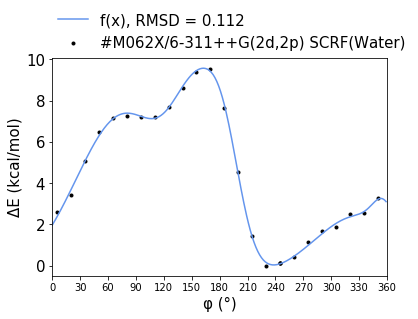

Latex: 

\begin{multline}
$f(x) = 8.0045e^{-\frac{(x-77.8524)^{2} } { 5455.9754 } }
6.2785e^{-\frac{(x-155.5753)^{2} } { 1246.5998 } } +
4.3391e^{-\frac{(x-185.5592)^{2} } { 702.7609 } } \\ +
3.0865e^{-\frac{(x-329.6700)^{2} } { 4730.6139 } }  +
1.2325e^{-\frac{(x-356.4230)^{2} } { 264.7385 } } +
6.6512e^{-\frac{(x-385.9060)^{2} } { 29.4680 } } \\ + -0.6690
\quad \quad 0 \leq x < 360$
\end{multline}


Python: 

def _4c1_a1_a4_4c1_PHI_(x):
	return six_gaussians(x, 8.004548395900155, 77.85243079906853, 5455.975445094231, 6.278452887568867, 155.57530607154112, 1246.5997583283254, 4.339126636164805, 185.55918875670042, 702.760927743488, 3.086543467473385, 329.6699570531439, 4730.613880964667, 1.2325156047555026, 356.4229901331709, 264.73850160023676, 6.65123523502103, 385.9060017816478, 29.468033387577474, -0.6689891832209945)

RMSD = 0.12236560876848682



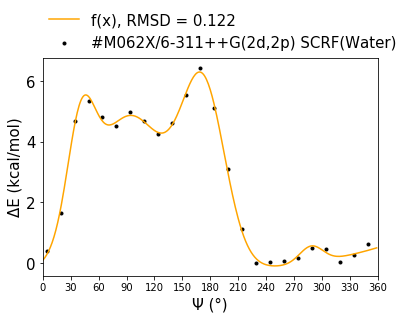

Latex: 

\begin{multline}
$f(x) = 3.4125e^{-\frac{(x-41.0496)^{2} } { 438.7352 } }
5.2050e^{-\frac{(x-93.7734)^{2} } { 3470.6270 } } +
5.6479e^{-\frac{(x-172.7821)^{2} } { 1099.6139 } } \\ +
0.5399e^{-\frac{(x-288.6235)^{2} } { 311.3212 } }  +
0.1978e^{-\frac{(x-3080.1990)^{2} } { 224.1930 } } +
42.7552e^{-\frac{(x-1118.1517)^{2} } { 149500.9596 } } \\ + -0.4001
\quad \quad 0 \leq x < 360$
\end{multline}


Python: 

def _4c1_a1_a4_4c1_PSI_(x):
	return six_gaussians(x, 3.4124832224264363, 41.04961909408829, 438.73522957578035, 5.205017267121669, 93.77342251726716, 3470.6270271385347, 5.64793890648658, 172.78206687795193, 1099.6138502546464, 0.5399345336830093, 288.6235030143382, 311.3211795140615, 0.19777, 3080.199, 224.193, 42.75524009023628, 1118.1516502561412, 149500.95957399305, -0.40013906745051925)


In [37]:
data = '4c1_a1_a4_4c1_PHI.csv'
guess = [4.57286, 61.5622, 1667.35, 1.83192, 125.896, 368.627, 3.71105, 190.337, 1476.16, 0.454284, 256.292, 445.417, 0.19777, 308.199, 224.193, 1.87345, 378.913, 838.579, 0]
six_optimised_values, rmsd = fit_the_curve(data, guess, "φ")

data = "4c1_a1_a4_4c1_PSI.csv"
guess = [4.57286, 61.5622, 1667.35, 1.83192, 125.896, 368.627, 3.71105, 190.337, 1476.16, 0.454284, 256.292, 445.417, 0.19777, 3080.199, 224.193, 1.87345, 378.913, 838.579, 0]
six_optimised_values, rmsd = fit_the_curve(data, guess, "Ψ")

/Volumes/Eric/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Volumes/Eric/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Volumes/Eric/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/Volumes/Eric/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/Volumes/Eric/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  



RMSD = 0.08012909208139243



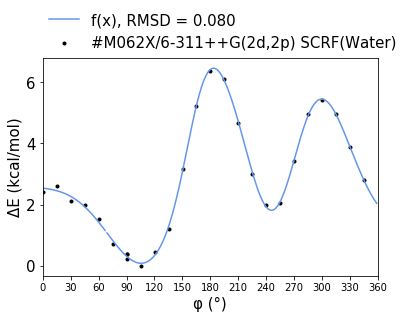

Latex: 

\begin{multline}
$f(x) = 6.9000e^{-\frac{(x-68.0000)^{2} } { 0.0000 } }
2.1829e^{-\frac{(x-173.0347)^{2} } { 782.1074 } } +
22.0760e^{-\frac{(x-247.9124)^{2} } { 3179.4279 } } \\ +
-22.8373e^{-\frac{(x-247.2659)^{2} } { 2216.6670 } }  +
-2.5502e^{-\frac{(x-108.0329)^{2} } { 2921.1467 } } +
-1.0700e^{-\frac{(x-374.1658)^{2} } { 1478.5165 } } \\ + 2.5828
\quad \quad 0 \leq x < 360$
\end{multline}


Python: 

def _4c1_b1_e3_4c1_PHI_(x):
	return six_gaussians(x, 6.9, 68.0, 0.0, 2.1828846769518644, 173.03466679642423, 782.107430265611, 22.076033552181478, 247.91235542964685, 3179.427863402181, -22.8373163134961, 247.2658611592196, 2216.667036946287, -2.55022585214848, 108.03287022900409, 2921.14668491252, -1.0699640395590786, 374.16581612779146, 1478.516456703076, 2.5827879156553832)

RMSD = 0.06254901845161677



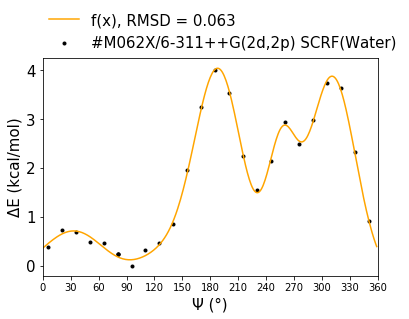

Latex: 

\begin{multline}
$f(x) = -16.3534e^{-\frac{(x-81.0501)^{2} } { 3322.9788 } }
0.1933e^{-\frac{(x--16.4282)^{2} } { 21.2588 } } +
4.1431e^{-\frac{(x-188.9939)^{2} } { 1285.2885 } } \\ +
2.6042e^{-\frac{(x-257.0953)^{2} } { 501.9173 } }  +
4.1347e^{-\frac{(x-311.2075)^{2} } { 1238.1876 } } +
16.7939e^{-\frac{(x-80.1017)^{2} } { 3644.3772 } } \\ + -0.2636
\quad \quad 0 \leq x < 360$
\end{multline}


Python: 

def _4c1_b1_e3_4c1_PSI_(x):
	return six_gaussians(x, -16.353361428095234, 81.05014946172244, 3322.9787528581573, 0.19332876294192744, -16.428215188100857, 21.25879192544326, 4.143139622643925, 188.99391396124682, 1285.288518723863, 2.604201607352957, 257.0952654229197, 501.9172917453481, 4.13468399093591, 311.20750135354564, 1238.187649210402, 16.793933170319352, 80.10165591925924, 3644.377155374538, -0.26363280270484474)


In [25]:
data = "4c1_b1_e3_4c1_PHI.csv"
guess = [6.9, 68, 0, 5.1, 173, 7000, 1.2, 297, 900, -0.6, 240, 200, -0.9, 74, 100, 1., 353, 26, 0.0]
six_optimised_values, rmsd = fit_the_curve(data, guess, "φ")

data = "4c1_b1_e3_4c1_PSI.csv"
guess = [4.57286, 61.5622, 1667.35, 1.83192, 0, 368.627, 3.71105, 190.337, 1476.16, 0.454284, 256.292, 445.417, 0.19777, 308.199, 224.193, 1.87345, 0, 838.579, 0]
six_optimised_values, rmsd = fit_the_curve(data, guess, "Ψ")

/Volumes/Eric/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Volumes/Eric/anaconda3/envs/science/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square



RMSD = 0.06406567766556842



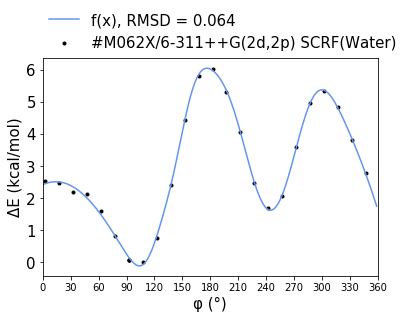

Latex: 

\begin{multline}
$f(x) = 9.0603e^{-\frac{(x-13.9180)^{2} } { 19557.5860 } }
1.0171e^{-\frac{(x-126.9404)^{2} } { 346.6350 } } +
4.5590e^{-\frac{(x-157.7290)^{2} } { 828.3444 } } \\ +
7.7332e^{-\frac{(x-194.9992)^{2} } { 1651.3907 } }  +
1.8482e^{-\frac{(x-290.4378)^{2} } { 975.9116 } } +
10.3948e^{-\frac{(x-315.6276)^{2} } { 8204.3639 } } \\ + -6.5500
\quad \quad 0 \leq x < 360$
\end{multline}


Python: 

def _4c1_b1_4e_4c1_PHI_(x):
	return six_gaussians(x, 9.06025964305074, 13.918009775817325, 19557.586005080557, 1.0170749534325136, 126.94038818125031, 346.63503771715307, 4.558950751752839, 157.7289558816583, 828.3443671955426, 7.733208358658988, 194.999222120058, 1651.390747799437, 1.8482231662167032, 290.4378054224115, 975.9115991154515, 10.394758197028223, 315.62760648087897, 8204.363919280378, -6.550024090244734)

RMSD = 0.06743350663800275



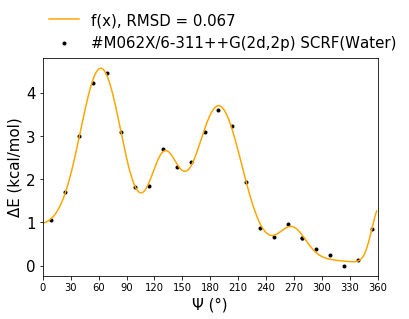

Latex: 

\begin{multline}
$f(x) = 3.8251e^{-\frac{(x-62.6491)^{2} } { 974.5350 } }
1.8836e^{-\frac{(x-130.5649)^{2} } { 447.4014 } } +
3.2879e^{-\frac{(x-189.4586)^{2} } { 1178.7673 } } \\ +
0.6631e^{-\frac{(x-268.1386)^{2} } { 416.4274 } }  +
-2.4042e^{-\frac{(x-614.7522)^{2} } { 596440.1762 } } +
1.3354e^{-\frac{(x-362.5701)^{2} } { 152.3753 } } \\ + 2.1899
\quad \quad 0 \leq x < 360$
\end{multline}


Python: 

def _4c1_b1_4e_4c1_PSI_(x):
	return six_gaussians(x, 3.8250755982350357, 62.64907964857074, 974.5349945219988, 1.8835701722516072, 130.56489468681704, 447.4013792821008, 3.28788822038002, 189.4585777787335, 1178.7672743665153, 0.6631493453978065, 268.1385993673475, 416.42744186028904, -2.4042382763440973, 614.7521703982278, 596440.1761624005, 1.335436311099386, 362.57012741213686, 152.37529951149526, 2.189891208613467)


In [50]:
data = "4c1_b1_4e_4c1_PHI.csv"
guess = [4.57286, 61.5622, 1667.35, 1.83192, 125.896, 368.627, 3.71105, 190.337, 1476.16, 0.454284, 256.292, 445.417, 0.19777, 308.199, 224.193, 1.87345, 378.913, 838.579, 0]
six_optimised_values, rmsd = fit_the_curve(data, guess, "φ")

data = "4c1_b1_4e_4c1_PSI.csv"
guess = [4.57286, 61.5622, 1667.35, 1.83192, 125.896, 368.627, 3.71105, 190.337, 1476.16, 0.454284, 256.292, 445.417, 0.19777, 300.199, 2240.193, 4.87345, 378.913, 100.579, -1]
six_optimised_values, rmsd = fit_the_curve(data, guess, "Ψ")

In [27]:
# # 1C4 axial 4C1 equitorial

# data = "L_a1-e4_D_PSI.csv"
# guess = [6.9, 68, 1240, 5.1, 173, 1960, 1.2, 297, 900, -0.6, 240, 200, -0.9, 74, 100, 1., 0, 0, 0.0]
# six_optimised_values, rmsd = fit_the_curve(data, guess, "Ψ")

# data = "L_a1-e4_D_PHI.csv"
# guess = [0, 290, 1000, 0, 237, 830, 0, 177, 1220, 1.2, 103, 100, 0.6, 56, 430, 0.2, 12, 60, 0]
# six_optimised_values, rmsd = fit_the_curve(data, guess, "φ")

In [11]:
# data = "D_1a_4a_L_PHI.csv"
# guess = [8.21589119e+00,8.16138978e+01,5.24344310e+03,6.11505428e+00
# ,1.58007895e+02,1.06513634e+03,3.45490210e+00,1.87407672e+02
# ,5.23076003e+02,1.31776770e+00,2.79310862e+02,2.52316352e+02
# ,1.92726134e+00,3.06873254e+02,4.74454835e+02,3.36470000e+00
# ,3.50952179e+02,9.89880088e+02,-2.55128570e-02]
# six_optimised_values, rmsd = fit_the_curve(data, guess, "φ")

# data = "D_1a_4a_L_PSI.csv"
# guess = [4, 290, 1000, 5.8, 237, 830, 6.1, 177, 1220, 1.2, 103, 100, 0.6, 56, 430, 0.2, 12, 60, 0]
# six_optimised_values, rmsd = fit_the_curve(data, guess, "Ψ")